In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [3]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [4]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [5]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [6]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std),np.array(Y_list)


## instantiate Bgolearn

In [7]:
Bgolearn = BGOS.Bgolearn()
method_name = 'EI_plugin'


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.423457638847608
The next datum recomended by Expected Improvement with plugin : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.7254018784262466
2 -th sampling, result =  3.593966195978189
3 -th sampling, result =  3.375579011401595
4 -th sampling, result =  3.2980133730399976
5 -th sampling, result =  3.2950648417851296
evaluated mean of added datum: [3.45760506]
evaluated std of added datum: 0.1725842386182627
---------------------------------------

1-th iteration 
 new added datum: [8.4, array([3.4576])]


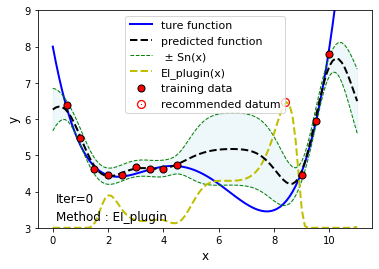

current optimal is : 3.568586224217276
The next datum recomended by Expected Improvement with plugin : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.434317664856784
2 -th sampling, result =  3.42838767121867
3 -th sampling, result =  3.549981243353782
4 -th sampling, result =  3.782417687037577
5 -th sampling, result =  3.8512748793509273
evaluated mean of added datum: [3.60927583]
evaluated std of added datum: 0.1762886134089776
---------------------------------------

2-th iteration 
 new added datum: [8.1, array([3.6093])]


<Figure size 432x288 with 0 Axes>

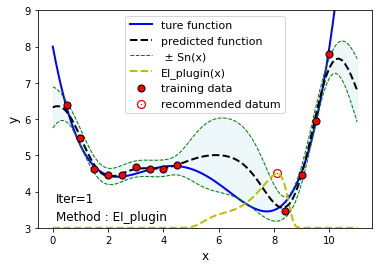

current optimal is : 3.5675036431009293
The next datum recomended by Expected Improvement with plugin : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.8543074636967756
2 -th sampling, result =  3.2601013447767793
3 -th sampling, result =  3.453458218907241
4 -th sampling, result =  3.4753652704498146
5 -th sampling, result =  3.1356693284924066
evaluated mean of added datum: [3.43578033]
evaluated std of added datum: 0.24412052596290298
---------------------------------------

3-th iteration 
 new added datum: [8.2, array([3.4358])]


<Figure size 432x288 with 0 Axes>

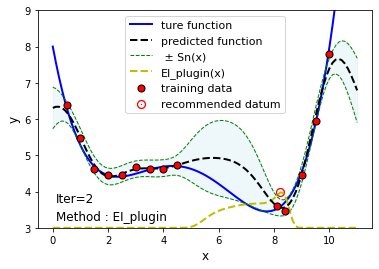

current optimal is : 3.514154124866634
The next datum recomended by Expected Improvement with plugin : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.4739343201467685
2 -th sampling, result =  4.739368852266965
3 -th sampling, result =  3.9293734407862364
4 -th sampling, result =  3.334102808327197
5 -th sampling, result =  3.307043022322145
evaluated mean of added datum: [3.75676449]
evaluated std of added datum: 0.5396647817417046
---------------------------------------

4-th iteration 
 new added datum: [8.2, array([3.7568])]


<Figure size 432x288 with 0 Axes>

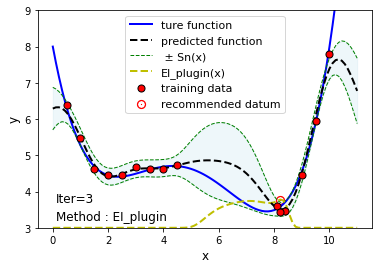

current optimal is : 3.5745361150853276
The next datum recomended by Expected Improvement with plugin : 
 x =  [6.88888889]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.90248334039142
2 -th sampling, result =  3.598227220152936
3 -th sampling, result =  3.7979809955056982
4 -th sampling, result =  3.988791451429018
5 -th sampling, result =  3.703405813671729
evaluated mean of added datum: [3.79817776]
evaluated std of added datum: 0.13869045560040177
---------------------------------------

5-th iteration 
 new added datum: [6.9, array([3.7982])]


<Figure size 432x288 with 0 Axes>

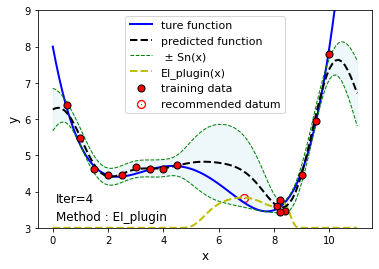

current optimal is : 3.5621807626564372
The next datum recomended by Expected Improvement with plugin : 
 x =  [7.77777778]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  2.537526381992092
2 -th sampling, result =  2.9441804426776383
3 -th sampling, result =  3.0683411878263582
4 -th sampling, result =  3.823013250239847
5 -th sampling, result =  3.193352298364072
evaluated mean of added datum: [3.11328271]
evaluated std of added datum: 0.4176695452627434
---------------------------------------

6-th iteration 
 new added datum: [7.8, array([3.1133])]


<Figure size 432x288 with 0 Axes>

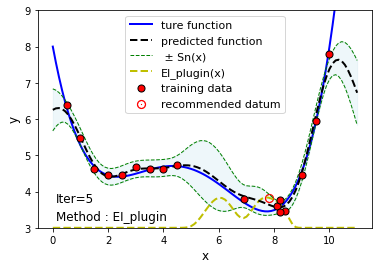

<Figure size 432x288 with 0 Axes>

In [8]:
obs = 5
guessed_noise_std = 0.3

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI_plugin()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.473667528516746
The next datum recomended by Expected Improvement with plugin : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.2115064241086264
2 -th sampling, result =  3.212166510090656
3 -th sampling, result =  3.7036535890222027
4 -th sampling, result =  3.876048893535893
5 -th sampling, result =  2.9682338798742838
evaluated mean of added datum: [3.39432186]
evaluated std of added datum: 0.3393818131036247
---------------------------------------

1-th iteration 
 new added datum: [8.4, array([3.3943])]


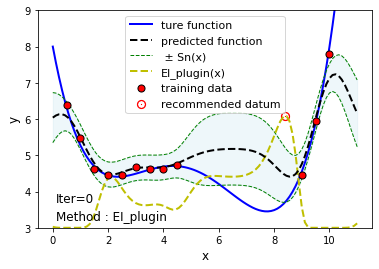

current optimal is : 3.692218102579452
The next datum recomended by Expected Improvement with plugin : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.237209715657662
2 -th sampling, result =  3.2408141056945925
3 -th sampling, result =  3.4978387376114615
4 -th sampling, result =  3.4023077675926103
5 -th sampling, result =  3.832518491568965
evaluated mean of added datum: [3.44213776]
evaluated std of added datum: 0.21891224722396138
---------------------------------------

2-th iteration 
 new added datum: [8.1, array([3.4421])]


<Figure size 432x288 with 0 Axes>

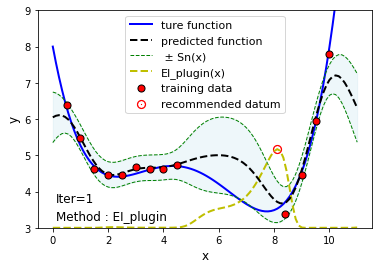

current optimal is : 3.5411182021436582
The next datum recomended by Expected Improvement with plugin : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.980144077747981
2 -th sampling, result =  2.3895031643894025
3 -th sampling, result =  2.489301871564575
4 -th sampling, result =  3.8833044987799
5 -th sampling, result =  3.5863565465946587
evaluated mean of added datum: [3.26572203]
evaluated std of added datum: 0.6877792122711179
---------------------------------------

3-th iteration 
 new added datum: [8.0, array([3.2657])]


<Figure size 432x288 with 0 Axes>

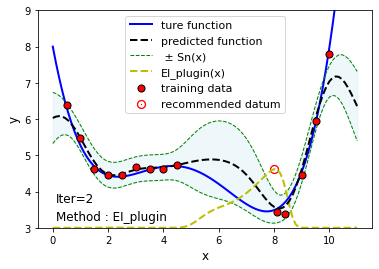

current optimal is : 3.420826475562211
The next datum recomended by Expected Improvement with plugin : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.496955449885611
2 -th sampling, result =  3.5256005543181264
3 -th sampling, result =  3.6195269065950955
4 -th sampling, result =  3.258373250194723
5 -th sampling, result =  3.162112207680179
evaluated mean of added datum: [3.41251367]
evaluated std of added datum: 0.1727620902109372
---------------------------------------

4-th iteration 
 new added datum: [7.9, array([3.4125])]


<Figure size 432x288 with 0 Axes>

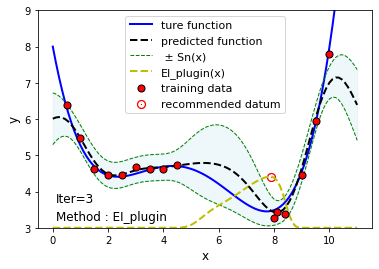

current optimal is : 3.405442703078106
The next datum recomended by Expected Improvement with plugin : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.5446717045996823
2 -th sampling, result =  3.138431576016817
3 -th sampling, result =  3.604425148912455
4 -th sampling, result =  3.4026510693619025
5 -th sampling, result =  3.962903543292792
evaluated mean of added datum: [3.53061661]
evaluated std of added datum: 0.26933307233515713
---------------------------------------

5-th iteration 
 new added datum: [7.9, array([3.5306])]


<Figure size 432x288 with 0 Axes>

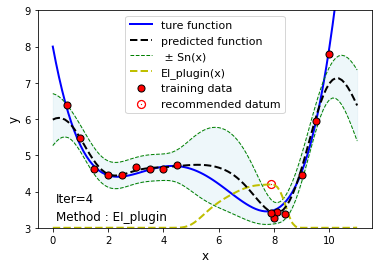

current optimal is : 3.4209901460856242
The next datum recomended by Expected Improvement with plugin : 
 x =  [7.]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.873946170815845
2 -th sampling, result =  3.599974175936908
3 -th sampling, result =  3.7246436839912986
4 -th sampling, result =  2.4368515675636484
5 -th sampling, result =  3.74294211110253
evaluated mean of added datum: [3.47567154]
evaluated std of added datum: 0.5266196822463285
---------------------------------------

6-th iteration 
 new added datum: [7.0, array([3.4757])]


<Figure size 432x288 with 0 Axes>

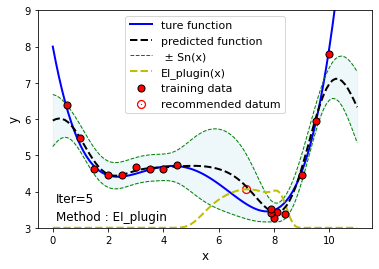

current optimal is : 3.371357134083187
The next datum recomended by Expected Improvement with plugin : 
 x =  [7.66666667]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.232893936489899
2 -th sampling, result =  3.288856488846835
3 -th sampling, result =  3.842272570945756
4 -th sampling, result =  3.4647976520272237
5 -th sampling, result =  3.5792433069474705
evaluated mean of added datum: [3.48161279]
evaluated std of added datum: 0.21858911410312412
---------------------------------------

7-th iteration 
 new added datum: [7.7, array([3.4816])]


<Figure size 432x288 with 0 Axes>

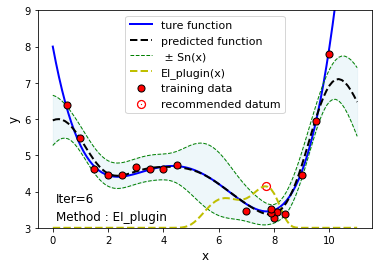

<Figure size 432x288 with 0 Axes>

In [9]:
obs = 5
guessed_noise_std = 0.5

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI_plugin()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.547688416227402
The next datum recomended by Expected Improvement with plugin : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.5475898368840033
2 -th sampling, result =  3.3059673613451506
3 -th sampling, result =  4.290856783709922
4 -th sampling, result =  4.321464301082457
5 -th sampling, result =  2.4813225771460523
evaluated mean of added datum: [3.58944017]
evaluated std of added datum: 0.6837949221362113
---------------------------------------

1-th iteration 
 new added datum: [8.3, array([3.5894])]


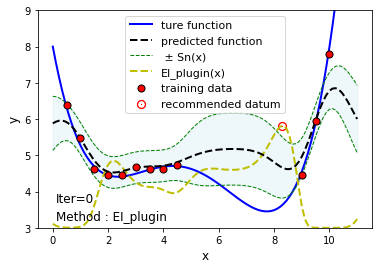

current optimal is : 3.9969082294715195
The next datum recomended by Expected Improvement with plugin : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  3.4305962585317076
2 -th sampling, result =  3.5679926659593337
3 -th sampling, result =  3.286930806088
4 -th sampling, result =  3.533087845334636
5 -th sampling, result =  3.370209217792331
evaluated mean of added datum: [3.43776336]
evaluated std of added datum: 0.10335552082733679
---------------------------------------

2-th iteration 
 new added datum: [8.1, array([3.4378])]


<Figure size 432x288 with 0 Axes>

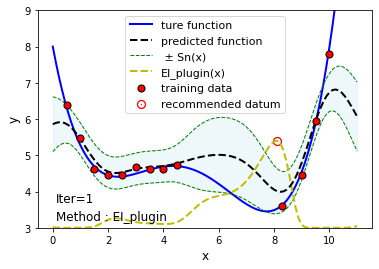

current optimal is : 3.7435310938467445
The next datum recomended by Expected Improvement with plugin : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.484122923871246
2 -th sampling, result =  3.454908686554749
3 -th sampling, result =  3.5859122313885323
4 -th sampling, result =  3.328972949449493
5 -th sampling, result =  2.788919530900348
evaluated mean of added datum: [3.32856726]
evaluated std of added datum: 0.2819950322369592
---------------------------------------

3-th iteration 
 new added datum: [7.9, array([3.3286])]


<Figure size 432x288 with 0 Axes>

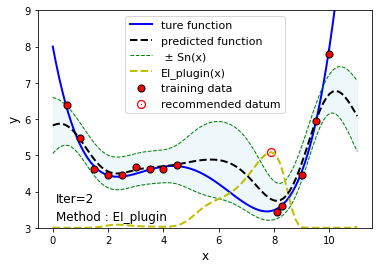

current optimal is : 3.5879171710860502
The next datum recomended by Expected Improvement with plugin : 
 x =  [7.66666667]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.6347699454609903
2 -th sampling, result =  3.5100762863334802
3 -th sampling, result =  3.0981439621756994
4 -th sampling, result =  3.1598033323143198
5 -th sampling, result =  3.4256761281121375
evaluated mean of added datum: [3.36569393]
evaluated std of added datum: 0.20533872236150966
---------------------------------------

4-th iteration 
 new added datum: [7.7, array([3.3657])]


<Figure size 432x288 with 0 Axes>

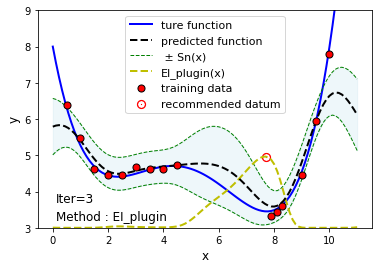

<Figure size 432x288 with 0 Axes>

In [10]:
obs = 5
guessed_noise_std = 0.7

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI_plugin()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数
